In [23]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from BatchLab import BatchLab
import numpy as np
%matplotlib inline

In [24]:
tend = 0.2
dt = 0.00004

In [25]:
bl = BatchLab(tend, dt)

In [26]:
C_init=0.00001/3
bl.add_species(element='H2SO4', init_C=0)
bl.add_species(element='HSO4',  init_C=0)
bl.add_species(element='SO4',  init_C=0)

bl.add_acid(species=['H2SO4', 'HSO4', 'SO4'], pKa=[-10, 1.99])

bl.add_species(element='Ca', init_C=0)
bl.add_species(element='CaSO4', init_C=1e-3)


bl.add_ion(element='Ca', charge=2)

In [27]:
bl.constants['Ks_CaSO4'] = 10**-4.58
bl.constants['k_pre'] = 1e-2
bl.constants['k_dis'] = 1

In [28]:
bl.rates['R_pre_CaSO4'] = 'k_pre * (Ca*SO4/Ks_CaSO4-1)'
bl.rates['R_dis_CaSO4'] = 'k_dis * CaSO4 * (1 - Ca*SO4/Ks_CaSO4)'

In [29]:
bl.dcdt['Ca'] = '-R_pre_CaSO4 + R_dis_CaSO4'
bl.dcdt['CaSO4'] = 'R_pre_CaSO4 - R_dis_CaSO4'
bl.dcdt['SO4'] = '-R_pre_CaSO4 + R_dis_CaSO4'

In [30]:
# %pdb

In [31]:
bl.solve()

Simulation started:
	 2017-09-11 23:18:26


Estimated time of the code execution:
	 0h:00m:22s
Will finish approx.:
	 2017-09-11 23:18:49


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


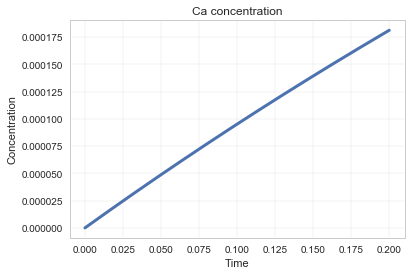

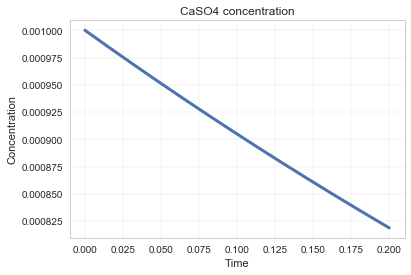

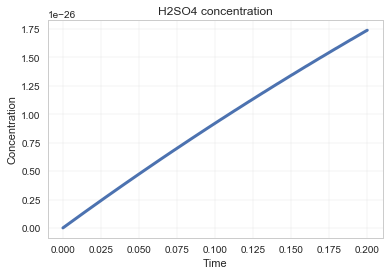

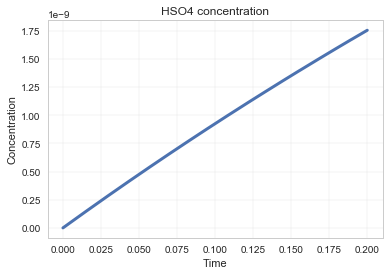

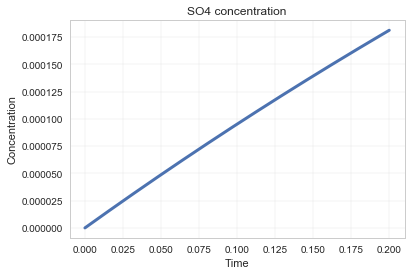

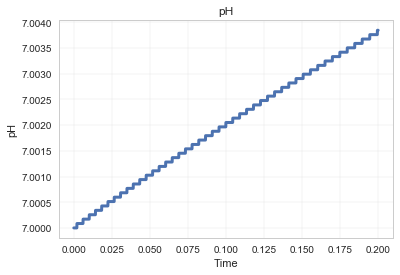

In [32]:
bl.plot_profiles()

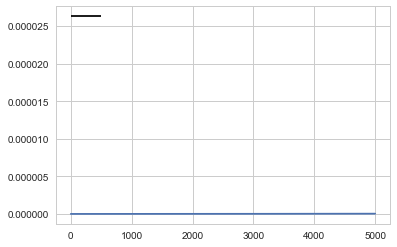

In [33]:
plt.plot(bl.SO4['concentration'][0]*bl.Ca['concentration'][0])
plt.hlines(bl.constants['Ks_CaSO4'], 0, 500)